# **MODULE 4**

### Import Libraty

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from collections import OrderedDict

## 4.1

**Import the csv file of the stock which contained the Bollinger columns as well.**

In [0]:
df1 = pd.read_csv("/content/drive/My Drive/DataScience/Aspiration Internship/week3_1.csv")

In [112]:
df1.head(10)

,14_day_Avg,14_day_std,Close Price,Upper_Band,Lower_Band
0,NaN,NaN,951.55,NaN,NaN
1,NaN,NaN,955.00,NaN,NaN
2,NaN,NaN,952.80,NaN,NaN
3,NaN,NaN,961.75,NaN,NaN
4,NaN,NaN,957.95,NaN,NaN
5,NaN,NaN,961.45,NaN,NaN
6,NaN,NaN,957.30,NaN,NaN
7,NaN,NaN,954.80,NaN,NaN
8,NaN,NaN,983.30,NaN,NaN
9,NaN,NaN,995.70,NaN,NaN


In [113]:
df1.shape

(494, 5)

In [0]:
df1.dropna(inplace=True)

In [115]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481 entries, 13 to 493
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   14_day_Avg   481 non-null    float64
 1   14_day_std   481 non-null    float64
 2   Close Price  481 non-null    float64
 3   Upper_Band   481 non-null    float64
 4   Lower_Band   481 non-null    float64
dtypes: float64(5)
memory usage: 22.5 KB



**Create a new column 'Call' , whose entries are -**
*   'Buy' if the stock price is below the lower Bollinger band
*   'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band
*   'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band
*   'Short' if the stock price is above the upper Bollinger band



In [0]:
def call(row):
    if row['Close Price'] <= row['Lower_Band']: return 'Buy'    
    if row['Close Price'] >= row['Upper_Band']: return 'Short'
    if row['Close Price'] == row['Upper_Band']: return 'Hold'    
    if row['Close Price'] >  row['14_day_Avg']: return 'Hold Buy / Liquidate Short'
    if row['Close Price'] <  row['14_day_Avg']: return 'Hold Short / Liquidate Buy'
    
df1['Call'] = df1.apply(call, axis=1)

In [117]:
df1['Call'].value_counts()

Hold Buy / Liquidate Short    250
Hold Short / Liquidate Buy    189
Short                          28
Buy                            14
Name: Call, dtype: int64

**Now train a classification model with the 3 bollinger columns and the stock price as inputs and 'Calls' as output. Check the accuracy on a test set. (There are many classifier models to choose from, try each one out and compare the accuracy for each)**

In [0]:
scaler = StandardScaler()

X = df1[['Close Price', '14_day_Avg', 'Upper_Band', 'Lower_Band']]
y = df1['Call']
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

max_features = len(y.unique())
encoder      = LabelEncoder()

In [0]:
classifiers = OrderedDict([
    ( "Nearest Neighbors", KNeighborsClassifier(max_features) ),
    ( "Linear SVM",        SVC(kernel="linear", C=0.025) ),
    ( "RBF SVM",           SVC(gamma=2, C=1) ),
    ( "Gaussian Process",  GaussianProcessClassifier(1.0 * RBF(1.0)) ),
    ( "Decision Tree",     DecisionTreeClassifier(max_depth=5) ),
    ( "Random Forest",     RandomForestClassifier(max_depth=5, n_estimators=10, max_features=max_features) ),
    ( "AdaBoost",          AdaBoostClassifier() ),
    ( "Naive Bayes",       GaussianNB() ),
])

In [120]:
scores = {}
for (name, classifier) in classifiers.items():
  classifier.fit(X_train, y_train)
  scores[name] = classifier.score(X_test, y_test)
    
scores = OrderedDict(sorted(scores.items(), key=lambda x: x[1]))
scores

OrderedDict([('AdaBoost', 0.503448275862069),
             ('Naive Bayes', 0.5172413793103449),
             ('Linear SVM', 0.5241379310344828),
             ('Decision Tree', 0.7034482758620689),
             ('RBF SVM', 0.7586206896551724),
             ('Random Forest', 0.7862068965517242),
             ('Nearest Neighbors', 0.8689655172413793),
             ('Gaussian Process', 0.9241379310344827)])

**Description :**
Here we found that, Gaussian Process has the highest score value, i.e. 92.41%

**Import another stock data and create the bollinger columns. Using the already defined model, predict the daily calls for this new stock.**

In [0]:
infosys_df = pd.read_csv("/content/drive/My Drive/DataScience/Aspiration Internship/week2.csv")

In [122]:
infosys_df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,year,month,vwap,PCT_change,Trend
0,INFY,EQ,2017-05-15,964.25,963.5,963.50,949.10,953.25,951.55,951.49,3648582,3.471580e+09,75335,3052819,83.67,2017,5,951.550000,0.000000,Slight or No change
1,INFY,EQ,2017-05-16,951.55,953.1,960.15,946.95,956.00,955.00,952.92,3065084,2.920775e+09,71808,1858063,60.62,2017,5,953.125077,0.003626,Slight or No change
2,INFY,EQ,2017-05-17,955.00,951.6,958.45,943.85,952.90,952.80,949.48,1457754,1.384110e+09,75429,792251,54.35,2017,5,953.067084,-0.002304,Slight or No change
3,INFY,EQ,2017-05-18,952.80,943.0,973.90,942.85,960.25,961.75,962.61,4028924,3.878282e+09,120990,2309450,57.32,2017,5,955.934447,0.009393,Slight positive
4,INFY,EQ,2017-05-19,961.75,961.5,962.70,947.85,957.40,957.95,954.18,2128698,2.031155e+09,88897,1457747,68.48,2017,5,956.233874,-0.003951,Slight or No change


In [0]:
infosys_df['Date']=pd.to_datetime(infosys_df['Date'])

In [0]:
infosys_df.set_index('Date', inplace=True)

In [0]:
infosys_df = infosys_df[ infosys_df.Series == 'EQ' ]

In [126]:
infosys_df.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,year,month,vwap,PCT_change,Trend
Date,,,,,,,,,,,,,,,,,,,
2017-05-15,INFY,EQ,964.25,963.5,963.50,949.10,953.25,951.55,951.49,3648582,3.471580e+09,75335,3052819,83.67,2017,5,951.550000,0.000000,Slight or No change
2017-05-16,INFY,EQ,951.55,953.1,960.15,946.95,956.00,955.00,952.92,3065084,2.920775e+09,71808,1858063,60.62,2017,5,953.125077,0.003626,Slight or No change
2017-05-17,INFY,EQ,955.00,951.6,958.45,943.85,952.90,952.80,949.48,1457754,1.384110e+09,75429,792251,54.35,2017,5,953.067084,-0.002304,Slight or No change
2017-05-18,INFY,EQ,952.80,943.0,973.90,942.85,960.25,961.75,962.61,4028924,3.878282e+09,120990,2309450,57.32,2017,5,955.934447,0.009393,Slight positive
2017-05-19,INFY,EQ,961.75,961.5,962.70,947.85,957.40,957.95,954.18,2128698,2.031155e+09,88897,1457747,68.48,2017,5,956.233874,-0.003951,Slight or No change


In [0]:
infosys_df["14_day_Avg"] = infosys_df['Close Price'].rolling(14).mean()
infosys_df["14_day_Std"] = infosys_df['Close Price'].rolling(14).std()
infosys_df['Upper_Band'] = infosys_df['14_day_Avg'] + infosys_df['14_day_Std']*2
infosys_df['Lower_Band'] = infosys_df['14_day_Avg'] - infosys_df['14_day_Std']*2

In [0]:
infosys_df.dropna(inplace=True)

In [0]:
infosys_df_X = scaler.fit_transform( infosys_df[['Close Price', '14_day_Std', 'Upper_Band', 'Lower_Band']] )

In [0]:
infosys_df['Call']      = classifiers["Naive Bayes"].predict( infosys_df_X )  # using previously trained Naive Bayes
infosys_df['Call_Code'] = encoder.fit(infosys_df['Call']).transform(infosys_df['Call'])

In [131]:
infosys_df['Call'].value_counts()

Hold Buy / Liquidate Short    274
Hold Short / Liquidate Buy    207
Name: Call, dtype: int64

In [132]:
infosys_df['Call_Code'].value_counts()

0    274
1    207
Name: Call_Code, dtype: int64

In [133]:
infosys_df.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,year,month,vwap,PCT_change,Trend,14_day_Avg,14_day_Std,Upper_Band,Lower_Band,Call,Call_Code
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2017-06-01,INFY,EQ,977.05,969.3,979.70,958.55,971.25,971.40,969.49,2754303,2.670263e+09,81421,1822506,66.17,2017,6,971.400000,-0.005783,Slight negative,968.671429,15.981320,1000.634068,936.708789,Hold Buy / Liquidate Short,0
2017-06-02,INFY,EQ,971.40,973.4,975.45,964.20,966.00,969.45,968.76,1958983,1.897793e+09,48927,1396644,71.29,2017,6,970.589522,-0.002007,Slight or No change,969.950000,15.203264,1000.356528,939.543472,Hold Buy / Liquidate Short,0
2017-06-05,INFY,EQ,969.45,970.0,972.00,957.05,959.00,958.75,961.71,2731349,2.626761e+09,83794,1941199,71.07,2017,6,966.245740,-0.011037,Negative,970.217857,14.950542,1000.118940,940.316774,Hold Buy / Liquidate Short,0
2017-06-06,INFY,EQ,958.75,965.0,987.50,964.40,980.00,979.35,980.08,3504343,3.434526e+09,83178,2018029,57.59,2017,6,970.439905,0.021486,Positive,972.114286,14.238105,1000.590495,943.638076,Hold Buy / Liquidate Short,0
2017-06-07,INFY,EQ,979.35,985.0,988.90,945.00,959.30,961.30,963.75,6227523,6.001805e+09,139990,2519343,40.45,2017,6,967.126136,-0.018431,Negative,972.082143,14.263787,1000.609717,943.554569,Hold Buy / Liquidate Short,0


## 4.2

**Now, we'll again utilize classification to make a trade call, and measure the efficiency of our trading algorithm over the past two years. For this assignment , we will use RandomForest classifier.**

Here We are import IDFC Dataset

In [0]:
idfc_df = pd.read_csv("/content/drive/My Drive/DataScience/Aspiration Internship/IDFC.csv")
index_drop = idfc_df.Series[idfc_df['Series'] != 'EQ'].index
idfc_df.drop(index_drop, inplace=True)
idfc_df['Date']=pd.to_datetime(idfc_df['Date'])
idfc_df.set_index('Date', inplace=True)

In [0]:
idfc_df["PCT_change"] = idfc_df["Close Price"].pct_change()

In [136]:
idfc_df.shape

(494, 15)

In [0]:
idfc_df.dropna(inplace=True)

In [138]:
idfc_df.shape

(493, 15)

In [139]:
idfc_df.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,PCT_change
Date,,,,,,,,,,,,,,,
2017-05-16,IDFC,EQ,63.70,64.00,64.60,62.90,64.55,64.25,63.80,4014549,2.561355e+08,12172,1694524,42.21,0.008634
2017-05-17,IDFC,EQ,64.25,64.65,64.65,63.25,63.25,63.35,63.58,4184709,2.660487e+08,6189,2802239,66.96,-0.014008
2017-05-18,IDFC,EQ,63.35,62.40,62.60,61.20,61.35,61.50,61.85,6040654,3.736229e+08,14151,2475921,40.99,-0.029203
2017-05-19,IDFC,EQ,61.50,61.85,62.30,60.30,61.00,61.15,61.20,3697284,2.262721e+08,7537,1711047,46.28,-0.005691
2017-05-22,IDFC,EQ,61.15,61.30,61.70,60.00,60.10,60.20,60.62,3714457,2.251839e+08,9335,1491139,40.14,-0.015536


**Define 4 new columns , whose values are:**
*   % change between Open and Close price for the day
*   % change between Low and High price for the day
*   5 day rolling mean of the day to day % change in Close Price
*   5 day rolling std of the day to day % change in Close Price

In [0]:
idfc_df['pc_Open_Close'] = ( idfc_df['Close Price'] - idfc_df['Open Price'] ) / idfc_df['Open Price']
idfc_df['pc_High_Low']   = ( idfc_df['High Price']  - idfc_df['Low Price']  ) / idfc_df['Low Price']

In [0]:
idfc_df['5_day_mean']    = idfc_df['PCT_change'].rolling(5).mean()
idfc_df['5_day_std']     = idfc_df['PCT_change'].rolling(5).std()

In [0]:
idfc_df.dropna(inplace=True)

In [143]:
idfc_df.shape

(489, 19)

**Create a new column 'Action' whose values are:**
*   1 if next day's price(Close) is greater than present day's.
*   (-1) if next day's price(Close) is less than present day's.
*   i.e. Action [ i ] = 1 if Close[ i+1 ] > Close[ i ]
*   i.e. Action [ i ] = (-1) if Close[ i+1 ] < Close[ i ]


In [0]:
idfc_df['Action'] = np.where( idfc_df['Close Price'].shift(-1) > idfc_df['Close Price'], 1, -1 )

In [145]:
idfc_df.tail()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,PCT_change,pc_Open_Close,pc_High_Low,5_day_mean,5_day_std,Action
Date,,,,,,,,,,,,,,,,,,,,
2019-05-07,IDFC,EQ,37.75,38.0,38.60,36.90,37.15,37.10,37.72,3697713,1.394837e+08,6148,1609390,43.52,-0.017219,-0.023684,0.046070,-0.022559,0.013790,1
2019-05-08,IDFC,EQ,37.10,37.0,38.65,36.85,37.55,37.60,37.90,7364218,2.791014e+08,11206,2871606,38.99,0.013477,0.016216,0.048847,-0.012893,0.018979,-1
2019-05-09,IDFC,EQ,37.60,37.9,38.10,36.95,37.45,37.60,37.57,7376399,2.771038e+08,8362,3335703,45.22,0.000000,-0.007916,0.031123,-0.007662,0.017989,1
2019-05-10,IDFC,EQ,37.60,37.6,38.20,37.25,38.10,38.10,37.81,2626094,9.929210e+07,8188,563859,21.47,0.013298,0.013298,0.025503,-0.004747,0.020313,-1
2019-05-13,IDFC,EQ,38.10,37.8,37.80,34.35,34.90,34.75,35.64,16211123,5.777244e+08,21287,7776099,47.97,-0.087927,-0.080688,0.100437,-0.015674,0.042301,-1


**Construct a classification model with the 4 new inputs and 'Action' as target**

In [0]:
X = idfc_df[['pc_Open_Close', 'pc_High_Low', '5_day_mean', '5_day_std']]
y = idfc_df['Action']  
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

As given in the question, we are taking RandomForest Classifier here

In [147]:
random_forest = RandomForestClassifier(n_estimators=100, max_features=2)
random_forest.fit(X_train,  y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [148]:
random_forest.score(X_test, y_test)

0.564625850340136

In [149]:
accuracy_score( y_test, random_forest.predict(X_test), normalize=True ) 

0.564625850340136

Here Accuracy Score is 56.46%

**Plot the net cumulative returns (in %) if we were to follow this algorithmic model**

In [0]:
cumulative_returns = ( 1 + (idfc_df['Close Price'].pct_change() * idfc_df['Action']) ).dropna().cumprod()

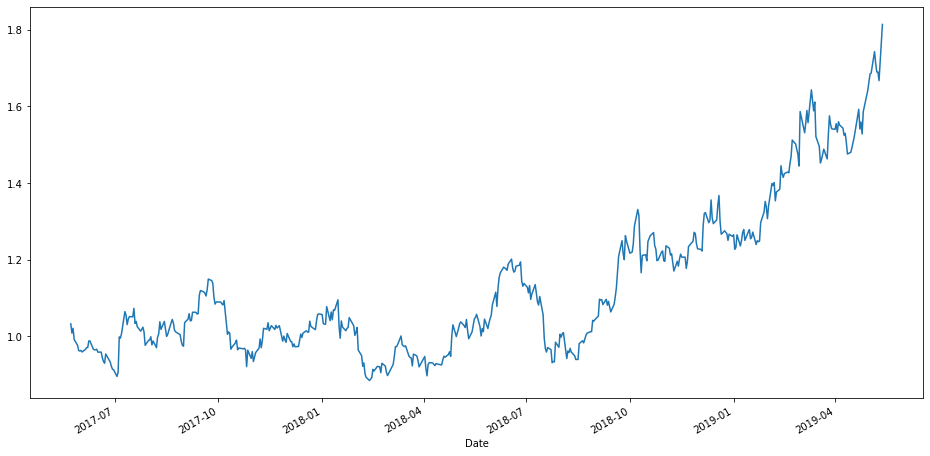

In [151]:
fig = plt.figure(figsize=(16,8))
cumulative_returns.plot()